In [1]:
import pandas as pd
import numpy as np
from visualisation_package.visualisation import visualize_feature_selection_strength, visualize_strength_vs_number_of_features
from visualisation_package.data_preparation import create_full_dataframe, aggregate_data


# Accuracy vs number of features

## Artificial data

In [2]:
arti = create_full_dataframe('data/results_artificial/').drop_duplicates().reset_index(drop=True)
arti['Number_of_features'] = pd.qcut(arti['Number_of_Features'], 7)

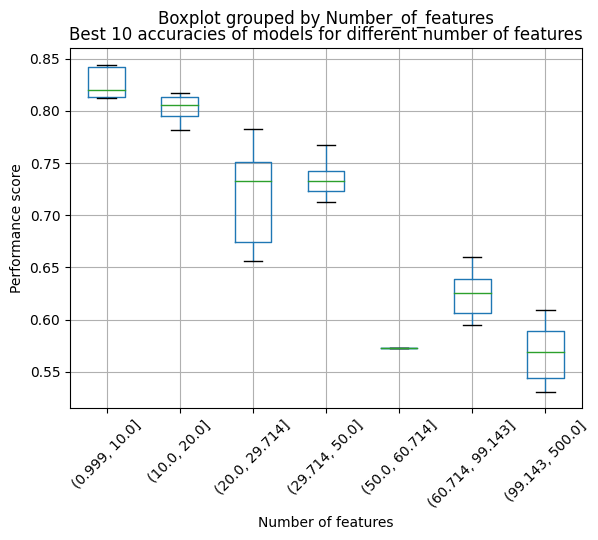

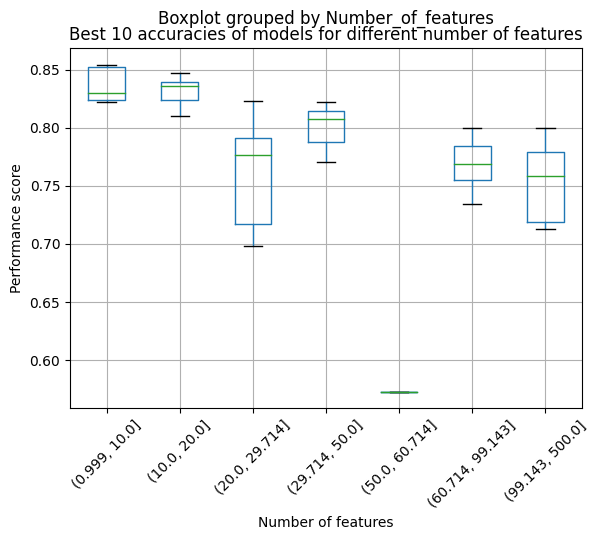

In [3]:
visualize_strength_vs_number_of_features(arti, groupby_column='Number_of_features', columns_to_evaluate=['Performance_score', 'Accuracy'], title='Best 10 accuracies of models for different number of features')

## SMS data

In [5]:
sms = create_full_dataframe('data/results_sms/').drop_duplicates().reset_index(drop=True)
sms['Number_of_features'] = pd.qcut(sms['Number_of_Features'], 7)

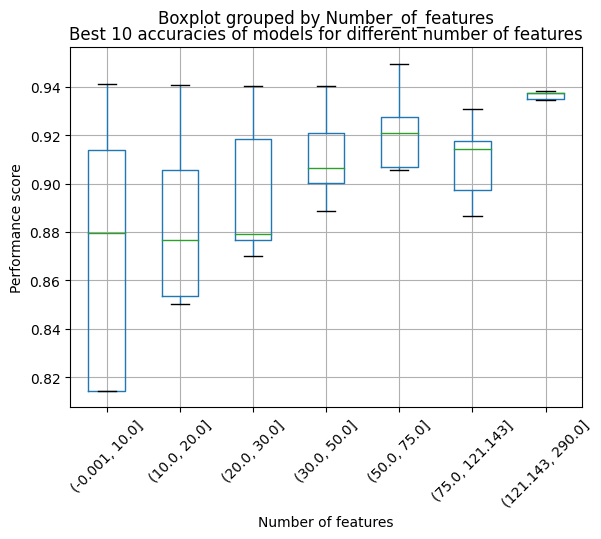

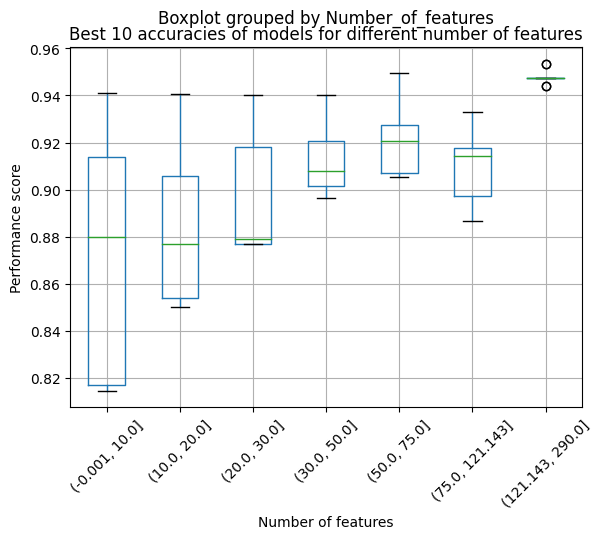

In [6]:
visualize_strength_vs_number_of_features(sms, groupby_column='Number_of_features', columns_to_evaluate=['Performance_score', 'Accuracy'], title='Best 10 accuracies of models for different number of features')

# Average feature selection strength

## Artificial data

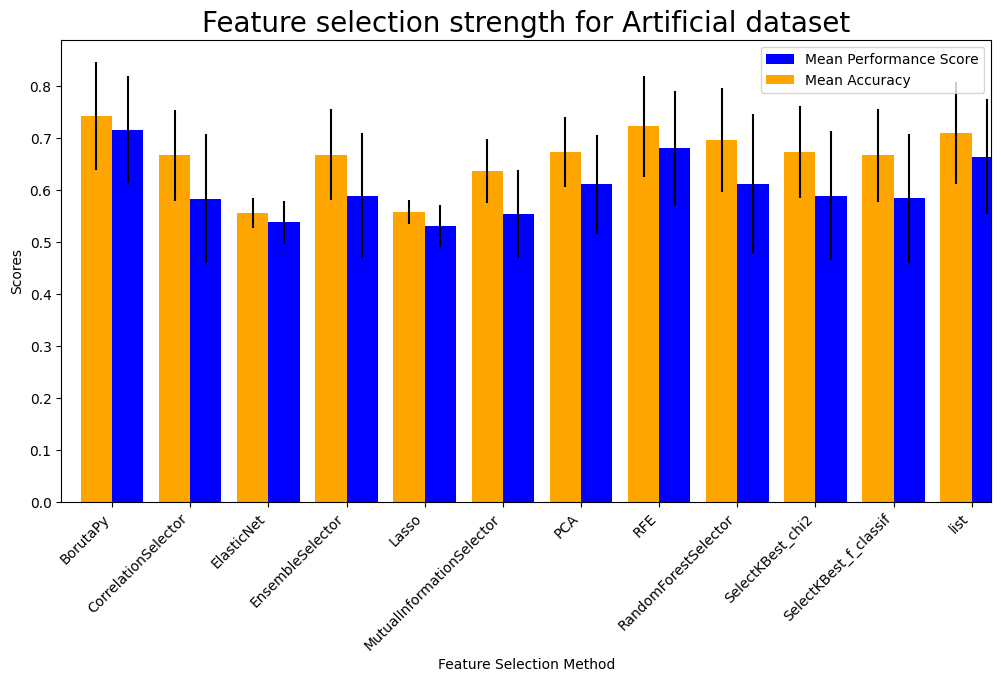

In [42]:
visualize_feature_selection_strength(arti, 'Feature selection strength for Artificial dataset')


## SMS data

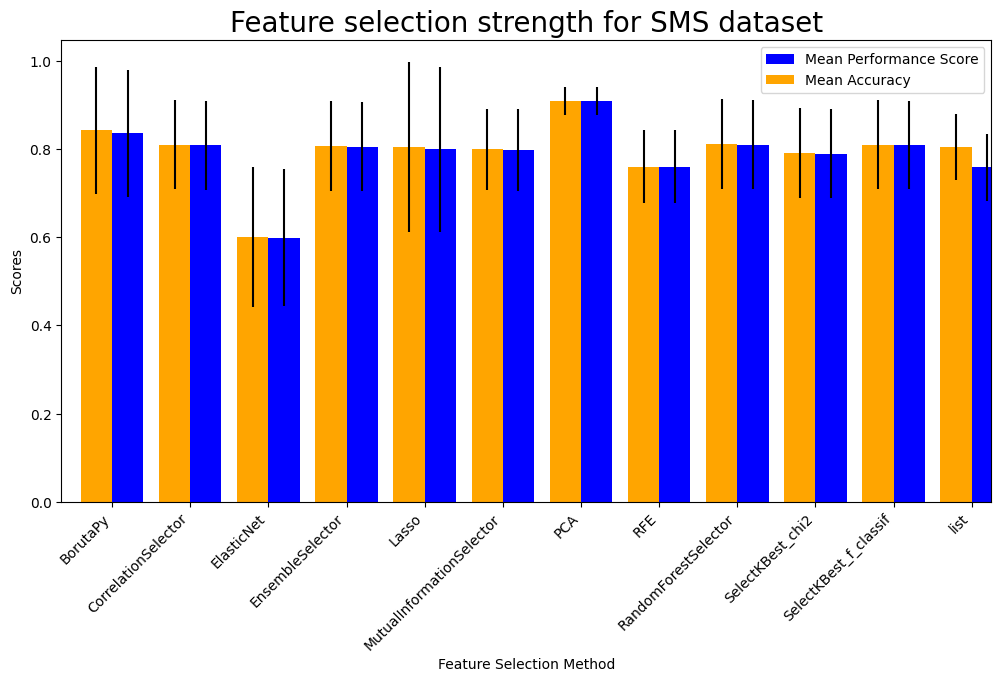

In [41]:
visualize_feature_selection_strength(sms, 'Feature selection strength for SMS dataset')